# 합성곱 신경망 (CNN, Convolutional neural network)

#### 동작원리 
   - 밀집층에는 뉴런마다 입력개수 만큼의 가중치가 있다. 모든 입력에 가중치를 곱한다.
   - 합성곱 신경망에서는 완전 연결 신경망과 달리 뉴런을 필터 혹은 커널
   - 커널은 입력에 곱하는 가중치이고, 필터는 뉴런 개수를 표현할 때 사용

#### 장점
   - 1차원이 아니라 2차원 입력에도 적용 ( 필터도 2차원이어야 함 )

- 밀집층에서 여러 개의 뉴런을 사용하듯이 합성곱 층에서도 여래 개의 필터를 사용함
- 합성곱 계산을 통해 얻은 출력을 특성맵

In [1]:
from tensorflow import keras
keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu')
#3,3 사이즈의 10개의 필터를 만듬

- 패딩 (padding) : 입력 배열의 주위를 가상의 원소로 채우는 것, 패딩은 0으로 채움
   - 패딩의 실제 역할은 순전히 커널을 찍을 횟수를 늘려주는 것 밖에는 없음
   - 실제 값은 0으로 채워져 있기 때문에 계산에 영향을 미치지는 않음
      - 세임 패딩 : 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩하는 것 ( 입력과 특성 맵의 크기를 동일 )

   -  세임 패딩 : 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩하는 것 -> 입력과 특성 맵의 크기를 통일
   - 밸리드 패딩 : 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우. 특성 맵의 크기가 줄어들 수 밖에 없음
   - 케라스 Conv2D 클래스에서는 padding 매개변수로 패딩을 지정할 수 있음. 기본 값은 'valid'로 밸리드 패딩, 세임 패딩은 'same'으로 지정

- 스트라이트 : 이동의 크기. 기본적으로 스트라이드는 1. 한 칸씩 이동함.
   - ex) keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides = 1)

####  폴링(pooling)
   - 합성곱 맵의 가로세로 크기를 줄이는 역할을 수행. 하지만 특성 캡의 개수는 줄이지 않음.

   - 최대 폴링 : 도장을 찍은 영역에서 가장 큰 값
   - 평균 폴링 : 도장을 찍은 영역에서 평균 값
       - ex) keras.layers.MaxPooling2D(2, strides = 2, padding = 'valid')

- 컬러 이미지를 사용한 합성곱
   - 컬러 이미지는 RGB(빨강, 초록, 파랑) 채널에 구성되어 있기 때문에 컴퓨터는 이를 3차원 배열로 표시 (3,3,3)
   - 합성곱의 계산은 (3, 3, 3) 영역에 해당하는 27개의 원소에 27개의 가중치를 곱하고 절편을 더하는 식

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1)/ 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding='same', input_shape=(28,28,1)))
#32개 필터를 사용하고 커널의 크기는 3,3 이며 렐루함수 사용, 세임 패딩 사용

In [4]:
model.add(keras.layers.MaxPool2D(2))

In [5]:
model.add(keras.layers.Conv2D(64,kernel_size = 3,  activation='relu',padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)

# monitor : 모니터할 지표를 지정 기본값은 'val_loss'이며 검증손실을 관찰
# save_weight_only : 매개변수의 기본값은 False로 전체모델을 저장 True이면 모델의 가중치와 절편만 저장
# save_best_only : 매개변수를 True라 지정하면 가장 낮은 검증 점수를 만드는 모델을 저장

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# monitor : 모니터할 지표를 지정 기본값은 'val_loss'이며 검증손실을 관찰
# patience : 모델이 더 이상 향상되지 않고 지속할 수 있는 최대 에포크 횟루를 지정
#  restore_best_weights : 최상의 모델 가중치를 복원할지 지정합니다. 기본값은 False입니다.

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.4696 - accuracy: 0.8328 - val_loss: 0.3053 - val_accuracy: 0.8865
Epoch 2/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.3038 - accuracy: 0.8913 - val_loss: 0.2737 - val_accuracy: 0.8977
Epoch 3/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2594 - accuracy: 0.9053 - val_loss: 0.2486 - val_accuracy: 0.9063
Epoch 4/20
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2284 - accuracy: 0.9158 - val_loss: 0.2320 - val_accuracy: 0.9159
Epoch 5/20
1500/1500 [==============================] - 47s 31ms/step - loss: 0.2067 - accuracy: 0.9238 - val_loss: 0.2302 - val_accuracy: 0.9130
Epoch 6/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.1858 - accuracy: 0.9307 - val_loss: 0.2119 - val_accuracy: 0.9236
Epoch 7/20
1500/1500 [==============================] - 51s 34ms/step - loss: 0.1666 - accuracy: 0.9377 - val_loss: 0.2237 -

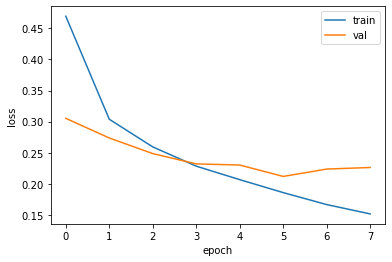

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [10]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 10ms/step - loss: 0.2119 - accuracy: 0.9236


[0.21188069880008698, 0.9235833287239075]

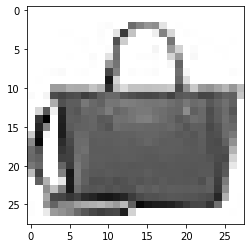

In [14]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [15]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 41ms/step
[[1.4907745e-15 6.6314827e-19 5.7008037e-17 3.8114615e-15 6.1212489e-14
  1.5972657e-13 3.5953889e-14 9.8151902e-16 1.0000000e+00 6.3778336e-16]]


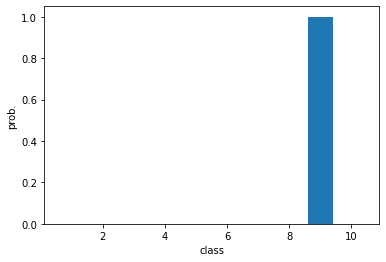

In [12]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [16]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [17]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [18]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
# 첫번째는 가중치 두번째는 절편

(3, 3, 1, 32) (32,)


In [19]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))
# 훈련하지 신경망의 가중치확인

In [20]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


#### 함수형 API
   - 딥러닝에서 복잡한 신경망 모델을 가지기에 함수형 API사용

In [21]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_1_input'), name='conv2d_1_input', description="created by layer 'conv2d_1_input'")


In [22]:
conv_acti = keras.Model(model.input, model.layers[0].output)

#### 특성 맵 시각화

In [23]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

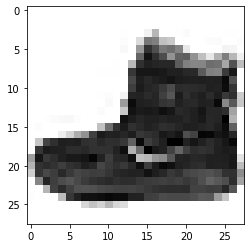

In [24]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [25]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 72ms/step


In [26]:
print(feature_maps.shape)

(1, 28, 28, 32)


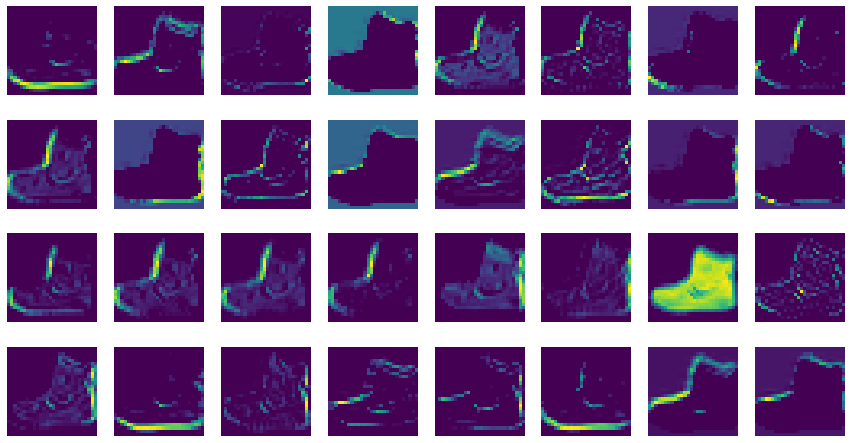

In [27]:
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in  range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
        
plt.show()

In [28]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [29]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 132ms/step


In [30]:
print(feature_maps.shape)

(1, 14, 14, 64)


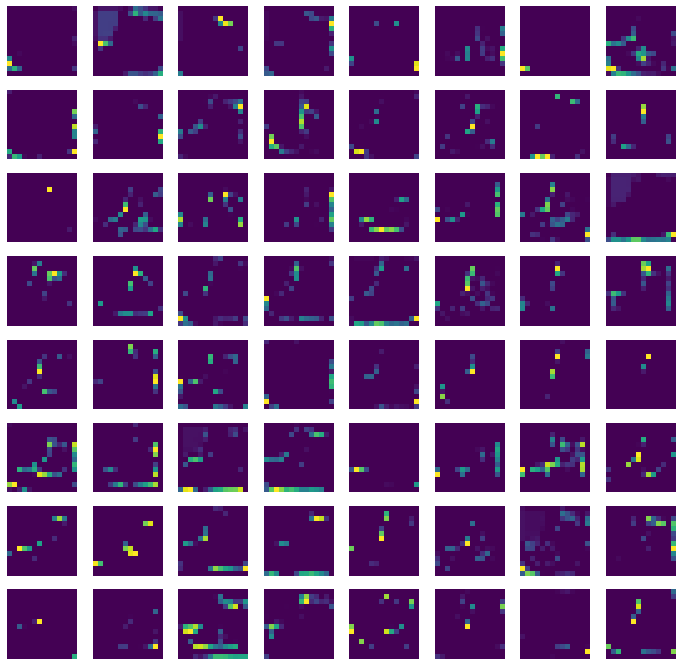

In [32]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()